Number of clusters: 10


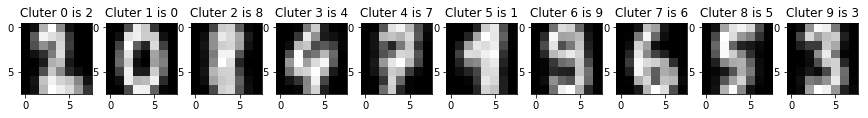

In [44]:
#Exersize 1
from scipy.cluster.vq import kmeans
from sklearn.datasets import load_digits
digits = load_digits()
import matplotlib.pyplot as plt
import numpy as np
im = digits.images.reshape((digits.images.shape[0], -1))

def get_labels(data, centroids):
    dist = [[np.linalg.norm(datas[0:]-centroid[0:]) for datas in data] for centroid in centroids]
    return np.argmin(dist, axis=0)

def Print(k):
    centroids,sr = kmeans(im, k)
    labels = get_labels(im, centroids)
    c = np.array([np.argmax(np.bincount(digits.target[labels==i])) for i in range(k)])

    plt.figure(figsize=(15,10))
    for i in range(k):
        plt.subplot(2, 10, i + 1)
        plt.title('Cluter {} is {}'.format(i, c[i]))
        plt.imshow(centroids[i].reshape((8, 8)), cmap='gray')
    return labels
k=int(input("Number of clusters: "))
labels = Print(k)

In [45]:
# Exersize 2
def err(labels,k):
    b = []
    s = []
    for i in range(k):
        x = np.argmax(np.bincount(digits.target[labels==i]))
        b.append(np.bincount(digits.target[labels==i]==x)[0])
        s.append(np.bincount(digits.target[labels==i]).sum())
    return [np.array(b), np.array(s)]

[b, s] = err(labels,k)
print('Total error is', b.sum()/s.sum())
for i in range(k):
    print('Error for cluster', i, 'is', b[i]/s[i])

Total error is 0.20923761825264328
Error for cluster 0 is 0.15428571428571428
Error for cluster 1 is 0.0111731843575419
Error for cluster 2 is 0.5515695067264574
Error for cluster 3 is 0.012121212121212121
Error for cluster 4 is 0.1282051282051282
Error for cluster 5 is 0.40860215053763443
Error for cluster 6 is 0.44176706827309237
Error for cluster 7 is 0.027472527472527472
Error for cluster 8 is 0.13836477987421383
Error for cluster 9 is 0.12429378531073447


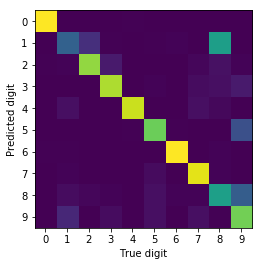

In [46]:
# Exersize 3
def confusion(labels):
    res = [np.argmax(np.bincount(digits.target[labels==i])) for i in range(k)]
    de = []
    for i in range(k):
        for j in range(i+1, k):
            if (res[i]==res[j]):
                labels[labels==j]=i
                de.append(j)

    res = np.argsort(res)
    for i in range(len(de)):
        res = np.delete(res,np.where(res==de[i]))

    conf = [[np.bincount(digits.target[labels==i], minlength = k)[j] for i in res] for j in range(10)]
    return conf

conf = confusion(labels)
plt.imshow(conf)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('True digit')
plt.ylabel('Predicted digit')
plt.show()

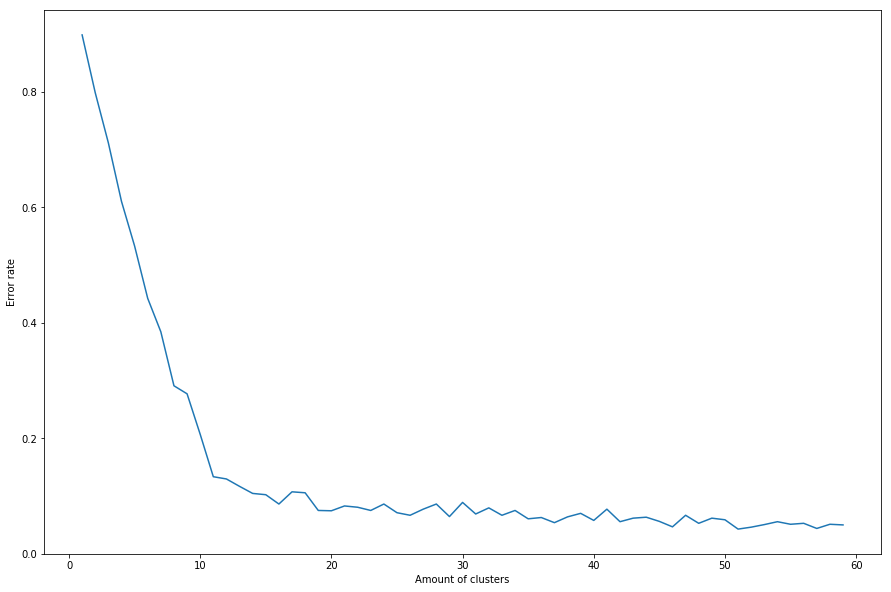

In [47]:
# Exersize 4
t = np.arange(1.0, 60.0, 1)
it = []
for k in range(1,60):
    centroids,sr = kmeans(im, k)
    labels = get_labels(im, centroids)
    [b,s] = err(labels,k)
    it.append(b.sum()/s.sum())

plt.figure(figsize=(15,10))
plt.plot(t, it)
plt.xlabel('Amount of clusters')
plt.ylabel('Error rate')
plt.show()

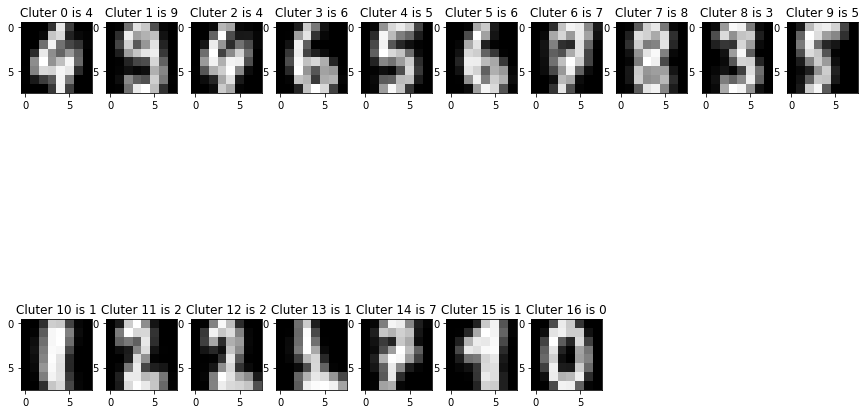

In [51]:
# Exersize 5
# optimal k=17
k=17
labels = Print(k)

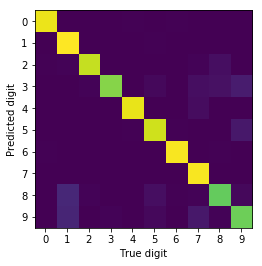

In [52]:
conf = confusion(labels)
plt.imshow(conf)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('True digit')
plt.ylabel('Predicted digit')
plt.show()